# Bag of Words

### Métodos

Del módulo `sklearn.feature_extraction.text` vamos a analizar que método favorece más al aprendizaje de nuestro clasificador. Tenemos un total de cuatro métodos para el tratamiento de textos, estos son:
- `CountVectorizer`
- `HashingVectorizer`
- `TfidfTransformer`
- `TfidfVectorizer`

Nosotros realizaremos las pruebas con `CountVectorizer` y `TfidfVectorizer`.

### ¿Por qué hemos descartado HashingVectorizer y TfidfTransformer?

El motivo principal podría parecer que es porque son alternativas distintas al `Vectorizer` cuyos conceptos no han sido vistos en la teoría, pero no es impedimento para no darles una oportunidad ¿Entonces por qué?

`HashingVectorizer` si que tiene algo que ver con la falta de conocimiento sobre el método de `Hashing`, asi que intentaremos darle una oportunidad si andamos bien de tiempo con este proyecto (spoiler: no creo).

`TfidfTransformer`ha sido descartado, ya que si es combinado con `CountVectorizer` obtenemos `TfidfVectorizer` por lo que no es de interés.

### Diferencias entre CountVectorizer y TfidfVectorizer

`CountVectorizer` convierte un conjunto de textos en una matriz de conteo de tokens, donde cada token (columna) representa una palabra y cada texto una fila de la matriz.

`TfidfVectorizer` es una modificación de `CountVectorizer`, donde se realizan dos pasos que lo diferencian:
- TF (Term Frequency): Indica la frecuencia de aparición de cada token por texto (fila), donde la suma de frecuencias de cada fila equivale a 1
- IDF (Inverse Document Frequency): Se tiene en cuenta la frecuencia de aparición del token en el resto de los textos, cuanto menos aparezca más peso se le dará.

TF-IDF: es la combinación de las dos anteriores, dando lugar a `TfidfVectorizer`

### ¿Qué es TF-IDF y para qué sirve?

¿Qué es TF-IDF?

Es una función que tiene en cuenta una serie de características, pero primero habrá que ver de donde nace.

`CountVectorizer()` es una función que se centra únicamente en el nº de apariciones que tiene cada palabra por review. Esto aunque pueda funcionar en algunos casos, no siempre será lo más óptimo, ya que habrá casos en los que la exclusividad de la palabra entre las distintas reviews sea esencial para la solución del problema. Asi nace `TfidfVectorizer()`


¿Para qué sirve?

Sirve para darle importancia a las palabras que cumplan las siguientes características:
- Palabras que aparecen mucho en una review en concreto (al igual que `CountVectorizer`)
- Palabras que aparecen poco entre las distintas reviews

### ¿Cómo se calcula TF-IDF?

Suponiendo que t es la palabra a tratar. La fórmula es calculada mediante el producto de $TF(t)$ con $IDF(t)$, tal que:

$\boldsymbol{TF-IDF(t) = TF(t) * IDF(t)}$

Las expresiones de $TF(t)$ e $IDF(t)$ varían según las librerías usadas, pero resultan ser similares

### 1. Fórmula vista en clase

1. Dado una review, calculamos las veces que aparece la palabra t y normalizamos

    $\boldsymbol{TF(t) = \frac{nº\space apariciones\space de\space t\space en\space la\space review}{nº\space de\space palabras\space que\space contiene\space la\space review}}$
    
    
2. Calculamos cuantas reviews contienen la palabra t

    $\boldsymbol{df(t) = reviews\space que\space contienen\space la\space palabra\space t}$
    
    
3. Calculamos el valor ligado a la aparición de la palabra t en las distintas reviews

    $\boldsymbol{IDF(t) = 1+log(\frac{N}{df(t)})}$
    
    
4. Finalemente, obtenemos el valor de TF-IDF de la palabra t

    $\boldsymbol{TF-IDF(t) = TF(t) * IDF(t)}$

### 2. Scikit-learn

1. Dado una review, calculamos las veces que aparece la palabra t (no normalizamos)

    $\boldsymbol{TF(t) = nº\space apariciones\space de\space t\space en\space la\space review}$
    
    
2. Calculamos cuantas reviews contienen la palabra t

    $\boldsymbol{df(t) = reviews\space que\space contienen\space la\space palabra\space t}$
    
    
3. Calculamos el valor ligado a la aparición de la palabra t en las distintas reviews

    - `smooth_idf=True (default)`:

    $\boldsymbol{IDF(t) = 1+log(\frac{1+N}{1+df(t)})}$

    - `smooth_idf=False`:
    
    $\boldsymbol{IDF(t) = 1+log(\frac{N}{df(t)})}$
    
    
4. Obtenemos el valor de TF-IDF de la palabra t

    $\boldsymbol{TF-IDF(t) = TF(t) * IDF(t)}$
    
    
5. Finalmente, normalizamos el resultado

    $\boldsymbol{TF-IDF(t) = \frac{TF-IDF(t)}{||TF-IDF(t)||_{2}}\space\space\space\space\space\space\space\space}$ 
    donde $\boldsymbol{\space||x||_{2} = (\sum_{i=1}^{n}|x_{i}|^{2})^{\frac{1}{2}}}$

He aquí la demostración:

In [14]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Corpus (Conjunto de textos)
corpus = ["pal1 pal1 pal2", 
          "pal1 pal3"]

# Conseguimos el Term Frequency del corpus
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(corpus)
tf_matrix = tf.toarray()
# Obtenemos el número de textos
n_rows = tf_matrix.shape[0]
# Calculamos el document frequency de cada palabra
df = np.sum(tf_matrix > 0, axis=0)
# Calculamos el Inverse Document Frequency
idf = np.log((1 + n_rows) / (1 + df)) + 1
# Obtenemos TF-IDF mediante el producto
tfidf_matrix = tf_matrix * idf
# Calculamos la norma de cada texto
norms = np.linalg.norm(tfidf_matrix, axis=1)
# Normalizamos TF-IDF
normalized_matrix = tfidf_matrix / norms[:, np.newaxis]

# Mostramos la matriz resultante
print(normalized_matrix)

[[0.81818021 0.57496187 0.        ]
 [0.57973867 0.         0.81480247]]


Comprobamos que es la misma que la de `scikit-learn`, aun así se pueden comprobar las fórmulas en la página web.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Conseguimos el TF-IDF mediante el objeto que nos ofrece scikit-learn
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Mostramos la matriz resultante
print(X.toarray())

[[0.81818021 0.57496187 0.        ]
 [0.57973867 0.         0.81480247]]


Efectivamente, los resultados coinciden.

### Histogramas que ayudan a entender los valores obtenidos con TF-IDF

Los histogramas que se van a mostrar, van ligados al $\boldsymbol{TF-IDF(t)}$ de `scikit-learn`

¿Qué características afectan los valores obtenidos?

- La diferencia del número de apariciones en distintas reviews (Document Frequency) entre palabras (debido a la fórmula $\boldsymbol{IDF(t)}$)

- La diferencia del número de palabras entre reviews (debido a la normalización con `L2-Norm`)

### 1. Cantidad de reviews a las que pertenece cada palabra

El número de reviews que contienen una palabra en concreto (Document Frequency) va ligado a la exclusividad de dicha palabra, es decir, si una palabra aparece en muy pocas reviews, tendrá mayor peso (exclusividad).

La fórmula empleada es la denominada $\boldsymbol{IDF(t) = 1+log(\frac{1+N}{1+df(t)})}$ cuando `smooth_idf=True`.

Observamos que cuanto menor sea $\boldsymbol{df(t)}$, mayor será $\boldsymbol{IDF(t)}$, es decir, son inversamente proporcionales.

Con esta conclusión, creo que es conveniente mostrar gráficamente si existe alguna diferencia entre los $\boldsymbol{df(t)}$ de las distintas palabras.

In [66]:
import pandas as pd

In [67]:
# Leemos los datos almacenados en textosLimpiosLemmatizationConTitulo.csv
df = pd.read_csv('textosLimpiosLemmatizationConTitulo.csv', delimiter=',', usecols=['Text','Rating'])
# Nos aseguramos de reemplazar los valores perdidos o NaN por ' '
df = df.fillna(' ')
# Comprobamos que hayamos leído correctamente las reviews
df.head()

,Text,Rating
0,magnetic charger job charge iphone ipad mini c...,4.0 out of 5 stars
1,hesitant believe would work tell charge time i...,4.0 out of 5 stars
2,like different size cord cord durable blue lig...,4.0 out of 5 stars
3,apple device make sure arrow correctly inserte...,4.0 out of 5 stars
4,far seem like decent cable wish give included ...,4.0 out of 5 stars


In [96]:
# Creamos un corpus a partir de las reviews
corpus = df['Text'].tolist()
# Ponemos binary=True de CountVectorizer para realizar el conteo de documentos por palabra
vectorizer = CountVectorizer(binary=True)
# Convertimos el corpus de palabras a números
X = vectorizer.fit_transform(corpus)
# Calculamos el número de reviews al que pertenece cada palabra
doc_freqs = np.sum(X.toarray(), axis=0)

# Estadisticas del conteo de reviews
print(pd.DataFrame(doc_freqs).describe())

                 0
count  9329.000000
mean     15.102155
std      79.873471
min       1.000000
25%       1.000000
50%       1.000000
75%       5.000000
max    2511.000000


Observamos que más del 75% de las palabras aparecen en solo 5 reviews o menos, por lo que en general las palabras tienen pesos muy similares en cuanto a exclusividad se refiere. También observamos que hay palabras que aparecen hasta en 2511 reviews, lo cual puede que no sean muy relevantes a la hora de realizar una clasificación.

En base a estos datos, podemos ver que umbrales escoger a la hora de asignar valores a `min_df` y `max_df`, son parámetros pertenecientes a las funciones `CountVectorizer()` y `TfidfVectorizer()`. Como se podrá deducir, `min_df` es el número mínimo (cota inferior) de reviews en el que debe de aparecer cada palabra y `max_df` el número máximo (cota superior) de reviews en el que debe de aparecer cada palabra.

In [101]:
import matplotlib.pyplot as plt

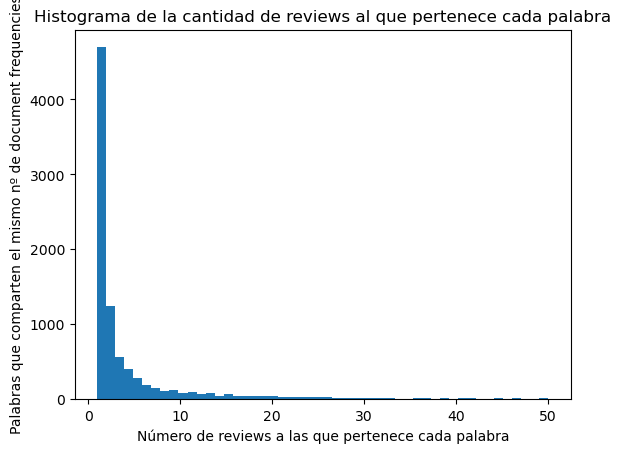

In [102]:
# Construimos el histograma de los valores obtenidos
# (Filtramos las reviews para que sea más comprensible la distribución)
plt.hist(doc_freqs[doc_freqs<=50], bins=50)
plt.xlabel('Número de reviews a las que pertenece cada palabra')
plt.ylabel('Palabras que comparten el mismo nº de document frequencies')
plt.title('Histograma de la cantidad de reviews al que pertenece cada palabra')
plt.show()

Podemos concluir que `min_df` no ha de ser usado, ya que el mínimo es 1 pero si lo subimos a 2 descartaremos más del 50% de las palabras, haciendo que la matriz se llene de ceros y los resultados no tengan sentido.

En cuanto a `max_df` hay más dudas de que valores probar, es por eso que hemos decidido realizar el siguiente método:

1. Ordenamos todos los $\boldsymbol{df(t)}$ de menor a mayor, tal que: $\boldsymbol{df(t_{1})≤ df(t_{2})≤\space ...\space ≤df(t_{n})}$.
2. Damos saltos de $\boldsymbol{k}$ en $\boldsymbol{k}$ y almacenamos los valores de $\boldsymbol{df(t_{i})}$ obtenidos en una lista.
3. Ploteamos la lista obtenida para averiguar que valor de `max_df` usar mediante la regla del codo.

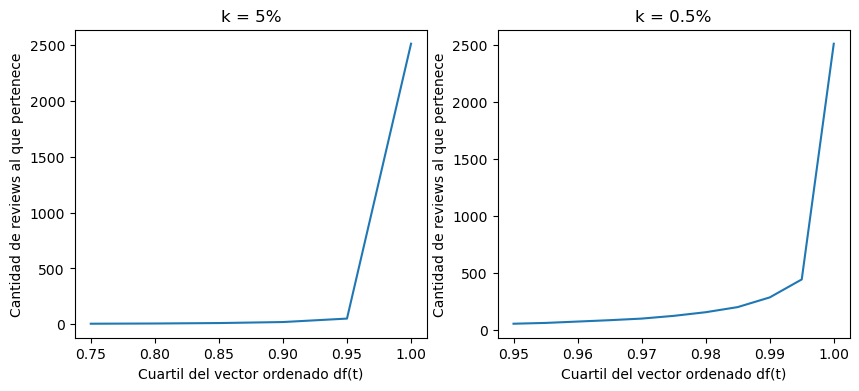

In [141]:
# Ordenamos los document frequencies
sorted_doc_freqs = np.sort(doc_freqs)
# Obtenemos el valor n (número de palabras)
n = len(sorted_doc_freqs)

# Definimos X e y
X1 = np.arange(0.75, 1.01, 0.05)
y1 = np.array([])

X2 = np.arange(0.95, 1.0, 0.005)
y2 = np.array([])

# Damos saltos de 5% en 5% a partir del 75% hasta el 100% de los valores ordenados
k = int(n*0.05)
for i in range(n-k*5, n+k, k):
    y1 = np.append(y1, sorted_doc_freqs[i-1])
    
# Damos saltos de 0.5% en 0.5% a partir del 95% hasta el 100% de los valores ordenados
k = int(n*0.005)
for i in range(n-k*10, n+k, k):
    y2 = np.append(y2, sorted_doc_freqs[i-1])    

# Creamos las gráficas
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# histogramas por clase
axs[0].plot(X1, y1)
axs[1].plot(X2, y2)

# Titulo de cada gráfica
axs[0].set_title('k = 5%')
axs[1].set_title('k = 0.5%')

axs[0].set_xlabel('Cuartil del vector ordenado df(t)')
axs[1].set_xlabel('Cuartil del vector ordenado df(t)')
axs[0].set_ylabel('Cantidad de reviews al que pertenece')
axs[1].set_ylabel('Cantidad de reviews al que pertenece')

# Printeo de los histogramas
plt.show()

Una vez vemos con claridad donde se encuentra ese codo, decidimos probar el algoritmo con `max_df` por debajo del valor que indica la gráfica.

Independientemente del resultado, observamos que en general los valores se concentran en un mismo rango de valores, por lo que los outliers como aquel que aparece en 2511 reviews se verá muy devaluado una vez pase por $\boldsymbol{IDF(t)}$.

### 2. Cantidad de palabras por review

La normalización de valores puede afectar severamente al peso que pueda tener una palabra, debido a la diferencia de escalas entre reviews.

Ejemplo: Realizamos el $\boldsymbol{TF-IDF(t)}$ de `pal 1` para cada una de las 4 reviews que disponemos, es decir, $\boldsymbol{TF-IDF(pal\space 1)_{j}}$ donde $\boldsymbol{j}$ es la i-ésima review.

In [20]:
df = pd.DataFrame({'TF-IDF(pal 1)': [1, 0, 5, 2]})
df.index = ['review 1', 'review 2', 'review 3', 'review 4']
df

,TF-IDF(pal 1)
review 1,1
review 2,0
review 3,5
review 4,2


Notamos que proporcionalmente la review 3 es la dominante respecto a las otras.

Ahora hallamos la norma de cada review, donde $\boldsymbol{||review\space j||_{2} = \sqrt{\sum_{i=1}^{n}|pal\space i|^{2}}}$

In [21]:
df['L2-Norm'] = [10, 7, 73, 8]
df

,TF-IDF(pal 1),L2-Norm
review 1,1,10
review 2,0,7
review 3,5,73
review 4,2,8


Por último, dividimos $\boldsymbol{TF-IDF(pal\space 1)_{j}}$ por la norma de cada review, para asi pasar todos los valores a una misma escala

In [22]:
df['||TF-IDF(pal 1)||'] = [1/10, 0/7, 5/73, 2/8]
df

,TF-IDF(pal 1),L2-Norm,||TF-IDF(pal 1)||
review 1,1,10,0.100000
review 2,0,7,0.000000
review 3,5,73,0.068493
review 4,2,8,0.250000


Esto hace que proporcionalmente, la review 3 ya no sea la dominante.

La norma va ligada al número de palabras que contiene una review y las proporciones que tiene cada palabra en dicha review, es decir, el número de veces que aparece esa palabra. Es por eso que me resulta conveniente mostrar gráficamente la variedad de número de palabras entre las distintas reviews.

In [68]:
# Obtenemos el número de palabras por review
df['Word Count'] = df['Text'].apply(lambda x: len(x.split()))

# Estadisticas del conteo de palabras
print(df['Word Count'].describe())

count    9269.000000
mean       17.683245
std        21.792920
min         1.000000
25%         6.000000
50%        12.000000
75%        22.000000
max       517.000000
Name: Word Count, dtype: float64


Más del 75% de las reviews no tienen más que 22 palabras, pero vemos que hay un texto con 517 palabras, 
esto probablemente significa que cada palabra de dicha review tenga muy poco peso respecto al resto de palabras en otras reviews.

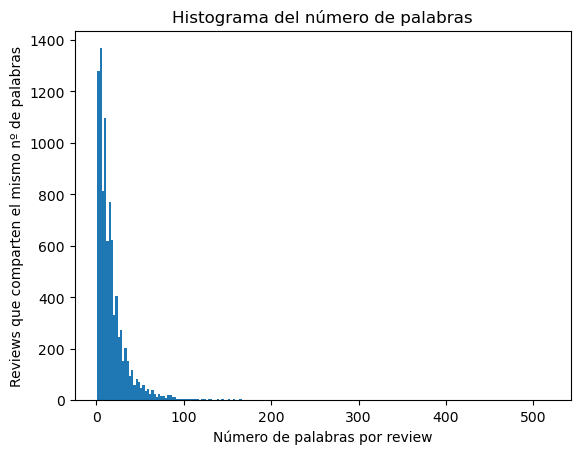

In [85]:
# Construimos el histograma de los valores obtenidos
plt.hist(df['Word Count'], bins=200)
plt.xlabel('Número de palabras por review')
plt.ylabel('Reviews que comparten el mismo nº de palabras')
plt.title('Histograma del número de palabras')
plt.show()

Ahora queremos comprobar si el número de palabras tiene alguna dependencia que la valoración asociada a la review, 
o si simplemente son independientes

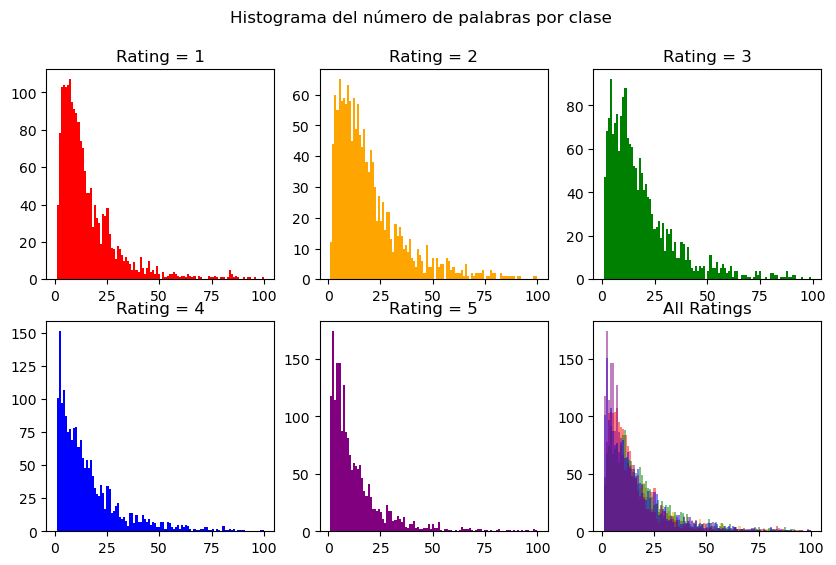

In [65]:
# Filtramos las reviews, para que las gráficas sean más comprensibles
df = df[df['Word Count'] <= 100]

# Cambiamos los ratings por enteros
text_to_int = {'1.0 out of 5 stars': 1, '2.0 out of 5 stars': 2, '3.0 out of 5 stars': 3,
               '4.0 out of 5 stars': 4, '5.0 out of 5 stars': 5}
df['Rating'] = df['Rating'].replace(text_to_int)

# Creamos las gráficas
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# histogramas por clase
axs[0, 0].hist(df['Word Count'][df['Rating']==1], bins=100, color='red')
axs[0, 1].hist(df['Word Count'][df['Rating']==2], bins=100, color='orange')
axs[0, 2].hist(df['Word Count'][df['Rating']==3], bins=100, color='green')
axs[1, 0].hist(df['Word Count'][df['Rating']==4], bins=100, color='blue')
axs[1, 1].hist(df['Word Count'][df['Rating']==5], bins=100, color='purple')

# histograma que combina los histogramas de cada clase (5 histogramas)
axs[1, 2].hist(df['Word Count'][df['Rating']==1], bins=100, color='red', alpha=0.5)
axs[1, 2].hist(df['Word Count'][df['Rating']==2], bins=100, color='orange', alpha=0.5)
axs[1, 2].hist(df['Word Count'][df['Rating']==3], bins=100, color='green', alpha=0.5)
axs[1, 2].hist(df['Word Count'][df['Rating']==4], bins=100, color='blue', alpha=0.5)
axs[1, 2].hist(df['Word Count'][df['Rating']==5], bins=100, color='purple', alpha=0.5)

# Titulo de cada gráfica
axs[0, 0].set_title('Rating = 1')
axs[0, 1].set_title('Rating = 2')
axs[0, 2].set_title('Rating = 3')
axs[1, 0].set_title('Rating = 4')
axs[1, 1].set_title('Rating = 5')
axs[1, 2].set_title('All Ratings')

# Titulo
fig.suptitle('Histograma del número de palabras por clase')

# Printeo de los histogramas
plt.show()

Podemos observar que la cantidad de palabras por review es independiente a la valoración asociada.

### Conclusión